# New Zealand EDA

Goal of the project -
To recommend timeline for reopening/lockdown.
For this, the main quantities that we'll be trying to estimate throughout time for a given region are:
- Number of available beds at hospitals.
- Number of active cases.
- Number of cumulated deaths.
- Number of recovered.

In [2]:

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
df=pd.read_csv(r'C:\Users\DELL\Downloads\owid-covid-data.csv')


#df(owid-covid-data.csv) is a collection of the COVID-19 data maintained by Our World in Data.

In [3]:

#basic data analysis,quick view of data set
#showes first five rows of the data se
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


This data type have 41 columns

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [5]:
df.shape
# complete covid 19  world dataset 

(50011, 41)

In [57]:
#  data set have 50011 rows and 41 columns

# #EDA for New Zealand
from covid 19 world dataset Select data where location=New Zealand

In [6]:
df_nzl=df[(df['location']=='New Zealand')]

In [7]:
df_nzl.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34882,NZL,Oceania,New Zealand,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34883,NZL,Oceania,New Zealand,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34884,NZL,Oceania,New Zealand,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34885,NZL,Oceania,New Zealand,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34886,NZL,Oceania,New Zealand,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917


In [15]:
df_nzl.info()
#41 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               290 non-null    float64
 1   aged_70_older               290 non-null    float64
 2   cardiovasc_death_rate       290 non-null    float64
 3   diabetes_prevalence         290 non-null    float64
 4   female_smokers              290 non-null    float64
 5   gdp_per_capita              290 non-null    float64
 6   hospital_beds_per_thousand  290 non-null    float64
 7   human_development_index     290 non-null    float64
 8   life_expectancy             290 non-null    float64
 9   male_smokers                290 non-null    float64
 10  median_age                  290 non-null    float64
 11  new_cases                   281 non-null    float64
 12  new_cases_smoothed          284 non-null    float64
 13  new_deaths                  2

In [61]:
#new zealand has 290  entries

In [16]:
#sort the column 
df_nzl=df_nzl.reindex(sorted(df_nzl.columns), axis=1)

# Number of missing values per column.

In [17]:
# number of missing value per column
df_nzl.isnull().sum()

aged_65_older                  0
aged_70_older                  0
cardiovasc_death_rate          0
diabetes_prevalence            0
female_smokers                 0
gdp_per_capita                 0
hospital_beds_per_thousand     0
human_development_index        0
life_expectancy                0
male_smokers                   0
median_age                     0
new_cases                      9
new_cases_smoothed             6
new_deaths                     9
new_deaths_smoothed            6
new_tests                     71
new_tests_smoothed            78
population                     0
population_density             0
positive_rate                 78
stringency_index               9
tests_per_case                96
tests_units                   71
total_cases                    9
total_deaths                   9
total_tests                   71
dtype: int64

In [10]:
df_nzl.drop(['extreme_poverty','handwashing_facilities','date','location','iso_code','continent','location',
            'total_tests_per_thousand','total_deaths_per_million','total_cases_per_million',
            'new_tests_smoothed_per_thousand','new_tests_per_thousand',
            'new_tests_per_thousand','new_deaths_smoothed_per_million','new_deaths_per_million','new_cases_smoothed_per_million',
             'new_cases_per_million'],axis=1, inplace=True)
#

In [11]:
df_nzl.info()
#after drop 26 cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               290 non-null    float64
 1   aged_70_older               290 non-null    float64
 2   cardiovasc_death_rate       290 non-null    float64
 3   diabetes_prevalence         290 non-null    float64
 4   female_smokers              290 non-null    float64
 5   gdp_per_capita              290 non-null    float64
 6   hospital_beds_per_thousand  290 non-null    float64
 7   human_development_index     290 non-null    float64
 8   life_expectancy             290 non-null    float64
 9   male_smokers                290 non-null    float64
 10  median_age                  290 non-null    float64
 11  new_cases                   281 non-null    float64
 12  new_cases_smoothed          284 non-null    float64
 13  new_deaths                  2

In [ ]:

# Impute the missing values with mean imputation
#df_nzl= df_nzl.fillna(df_nzl.mean())

In [12]:
df_nzl.isnull().sum()

aged_65_older                  0
aged_70_older                  0
cardiovasc_death_rate          0
diabetes_prevalence            0
female_smokers                 0
gdp_per_capita                 0
hospital_beds_per_thousand     0
human_development_index        0
life_expectancy                0
male_smokers                   0
median_age                     0
new_cases                      9
new_cases_smoothed             6
new_deaths                     9
new_deaths_smoothed            6
new_tests                     71
new_tests_smoothed            78
population                     0
population_density             0
positive_rate                 78
stringency_index               9
tests_per_case                96
tests_units                   71
total_cases                    9
total_deaths                   9
total_tests                   71
dtype: int64

In [ ]:
#df_nzl.info()

In [13]:
#
#df_nr_1_num=df_nr_1.select_dtypes(np.number)
#df_nr_1_obj=df_nr_1.select_dtypes('object')
df_nzl_obj=df_nzl.select_dtypes('object')
df_nzl_num=df_nzl.select_dtypes(np.number)

In [118]:
df_nzl_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tests_units  219 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [119]:
df_nzl_obj['tests_units'].value_counts()

tests performed    219
Name: tests_units, dtype: int64

In [120]:

#df_gender = pd.get_dummies(df['gender'])
df_test_performed=pd.get_dummies(df_nzl_obj['tests_units'])

In [122]:
# convert categorical vaiable (tests_units) to numeric 
df_nzl_num = pd.concat([df_nzl_num, df_test_performed], axis=1)
print(df_nzl_num)


       aged_65_older  aged_70_older  cardiovasc_death_rate  \
34882         15.322           9.72                128.797   
34883         15.322           9.72                128.797   
34884         15.322           9.72                128.797   
34885         15.322           9.72                128.797   
34886         15.322           9.72                128.797   
...              ...            ...                    ...   
35167         15.322           9.72                128.797   
35168         15.322           9.72                128.797   
35169         15.322           9.72                128.797   
35170         15.322           9.72                128.797   
35171         15.322           9.72                128.797   

       diabetes_prevalence  female_smokers  gdp_per_capita  \
34882                 8.08            14.8       36085.843   
34883                 8.08            14.8       36085.843   
34884                 8.08            14.8       36085.843   
34885  

In [123]:
df_nzl_num.info()
#34 cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               290 non-null    float64
 1   aged_70_older               290 non-null    float64
 2   cardiovasc_death_rate       290 non-null    float64
 3   diabetes_prevalence         290 non-null    float64
 4   female_smokers              290 non-null    float64
 5   gdp_per_capita              290 non-null    float64
 6   hospital_beds_per_thousand  290 non-null    float64
 7   human_development_index     290 non-null    float64
 8   life_expectancy             290 non-null    float64
 9   male_smokers                290 non-null    float64
 10  median_age                  290 non-null    float64
 11  new_cases                   281 non-null    float64
 12  new_cases_smoothed          284 non-null    float64
 13  new_deaths                  2

In [124]:
df_nzl_num.head()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,...,new_tests_smoothed,population,population_density,positive_rate,stringency_index,tests_per_case,total_cases,total_deaths,total_tests,tests performed
34882,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,NaN,4822233.0,18.206,NaN,NaN,NaN,0.0,0.0,NaN,0
34883,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,NaN,4822233.0,18.206,NaN,0.0,NaN,0.0,0.0,NaN,0
34884,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,NaN,4822233.0,18.206,NaN,0.0,NaN,0.0,0.0,NaN,0
34885,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,NaN,4822233.0,18.206,NaN,0.0,NaN,0.0,0.0,NaN,0
34886,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,NaN,4822233.0,18.206,NaN,0.0,NaN,0.0,0.0,NaN,0


In [125]:
df_nzl_num['tests performed'].value_counts()

1    219
0     71
Name: tests performed, dtype: int64

In [126]:
# number of missing value per column for numerical datatypes
df_nzl_num.isnull().sum()

aged_65_older                  0
aged_70_older                  0
cardiovasc_death_rate          0
diabetes_prevalence            0
female_smokers                 0
gdp_per_capita                 0
hospital_beds_per_thousand     0
human_development_index        0
life_expectancy                0
male_smokers                   0
median_age                     0
new_cases                      9
new_cases_smoothed             6
new_deaths                     9
new_deaths_smoothed            6
new_tests                     71
new_tests_smoothed            78
population                     0
population_density             0
positive_rate                 78
stringency_index               9
tests_per_case                96
total_cases                    9
total_deaths                   9
total_tests                   71
tests performed                0
dtype: int64

In [ ]:
# cont tmw

In [ ]:
#df_nzl['tests_units'].fillna(df_nzl['tests_units'].mode(),inplace=True)

In [127]:
# Inspect missing values in the dataset
print(df_nzl_num.isnull().values.sum())

451


In [128]:
df_nzl_num= df_nzl_num.fillna(df_nzl_num.mean())
#filling missing value with mean


In [129]:
#print number of missing value
print(df_nzl_num.isnull().values.sum())

0


In [130]:
df_nzl_num.isnull().sum()

aged_65_older                 0
aged_70_older                 0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
gdp_per_capita                0
hospital_beds_per_thousand    0
human_development_index       0
life_expectancy               0
male_smokers                  0
median_age                    0
new_cases                     0
new_cases_smoothed            0
new_deaths                    0
new_deaths_smoothed           0
new_tests                     0
new_tests_smoothed            0
population                    0
population_density            0
positive_rate                 0
stringency_index              0
tests_per_case                0
total_cases                   0
total_deaths                  0
total_tests                   0
tests performed               0
dtype: int64

In [131]:
df_nzl_num.shape

(290, 26)

# Exploratory data analysis

# Univarate Analysis

In [132]:
df_nzl_num.describe()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,...,new_tests_smoothed,population,population_density,positive_rate,stringency_index,tests_per_case,total_cases,total_deaths,total_tests,tests performed
count,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,...,290.000000,290.0,2.900000e+02,290.000000,290.000000,290.000000,290.000000,290.000000,2.900000e+02,290.000000
mean,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,4712.330189,4822233.0,1.820600e+01,0.002792,39.010996,2960.401577,879.330961,14.395018,4.145765e+05,0.755172
std,3.736798e-14,3.914740e-14,6.833001e-13,3.380912e-14,7.829481e-14,1.895019e-10,1.156628e-14,3.336427e-16,5.551814e-13,9.253023e-14,...,3022.107026,0.0,6.405939e-14,0.005960,28.986404,3427.806229,555.306537,10.302879,2.703010e+05,0.430728
min,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,106.000000,4822233.0,1.820600e+01,0.000000,0.000000,25.713000,0.000000,0.000000,3.120000e+02,0.000000
25%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,2860.000000,4822233.0,1.820600e+01,0.000000,19.440000,1544.093250,56.250000,0.000000,2.461900e+05,1.000000
50%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,4712.330189,4822233.0,1.820600e+01,0.001000,31.940000,2960.401577,1154.000000,21.000000,4.145765e+05,1.000000
75%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,5133.500000,4822233.0,1.820600e+01,0.002792,51.042500,2960.401577,1217.000000,22.000000,4.717380e+05,1.000000
max,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,21258.000000,4822233.0,1.820600e+01,0.039000,96.300000,28707.000000,1520.000000,25.000000,1.011657e+06,1.000000


Visualization

[]

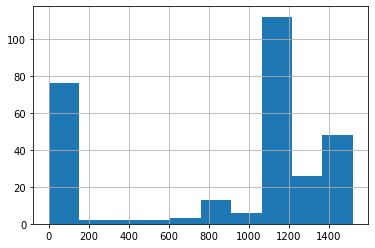

In [133]:
df_nzl_num.total_cases.hist()
plt.plot()

From the above image we see data is not normally distributed

[]

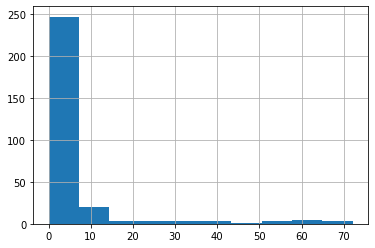

In [134]:
#new_cases_smoothed
df_nzl_num.new_cases_smoothed.hist()
plt.plot()

[]

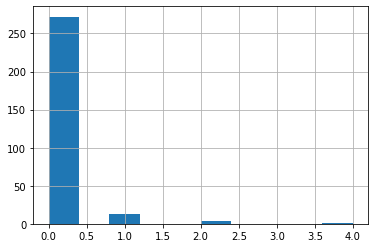

In [135]:
df_nzl_num.new_deaths.hist()
plt.plot()

[]

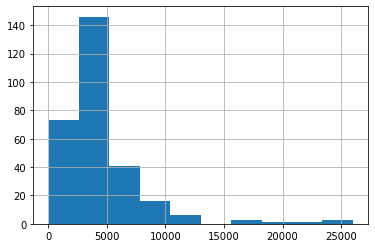

In [136]:
df_nzl_num.new_tests.hist()
plt.plot()

[]

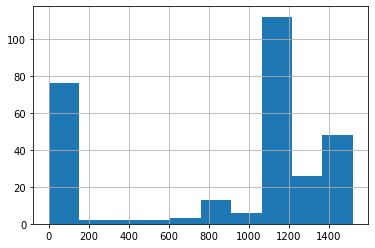

In [137]:
df_nzl_num.total_cases.hist()
plt.plot()

[]

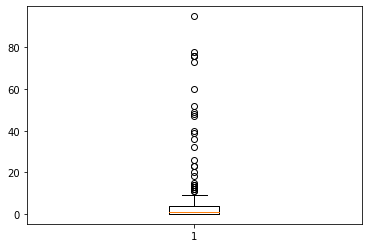

In [75]:
plt.boxplot(df_nzl_num.new_cases)
plt.plot()

In [ ]:
#Skewed right. A skewed right histogram looks like a lopsided mound, with a tail going off to the right:

# Bivariate analysis

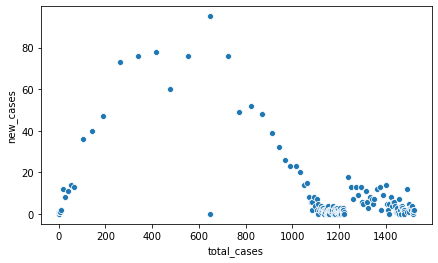

In [140]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl['total_cases'], y=df_nzl["new_cases"])

In [55]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl['total_cases']).corr(df_nzl['total_cases'])

0.9999999999999998

In [57]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl['new_cases']).corr(df_nzl["new_cases_smoothed"])

0.8733501444371715

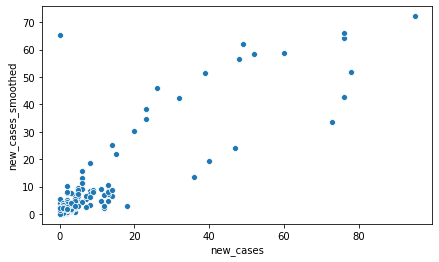

In [141]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl['new_cases'], y=df_nzl["new_cases_smoothed"])

In [58]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl['new_cases']).corr(df_nzl["positive_rate"])

0.9019771011659765

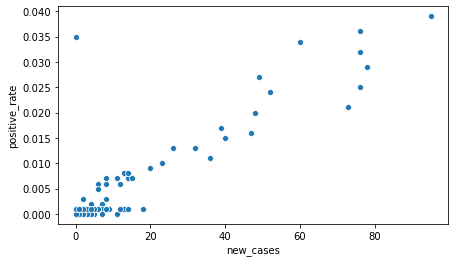

In [20]:
#no of active cases
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_cases'], y=df_nzl_num["positive_rate"])

In [59]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl['hospital_beds_per_thousand']).corr(df_nzl["positive_rate"])

1.5050582456247614e-16

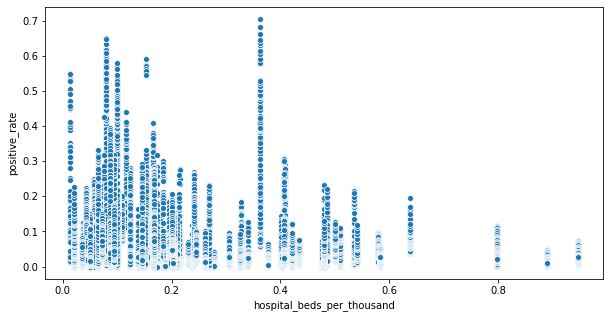

In [51]:
#number of available beds at hospital

plt.figure(figsize=(10,5))
sns.scatterplot(y=df['positive_rate'], x=df["hospital_beds_per_thousand"])


In [62]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df['total_tests_per_thousand']).corr(df["hospital_beds_per_thousand"])

0.0807860869492623

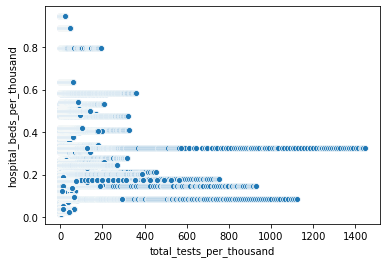

In [54]:
#plt.figure(figsize=(7,4))
sns.scatterplot(x=df['total_tests_per_thousand'], y=df["hospital_beds_per_thousand"])

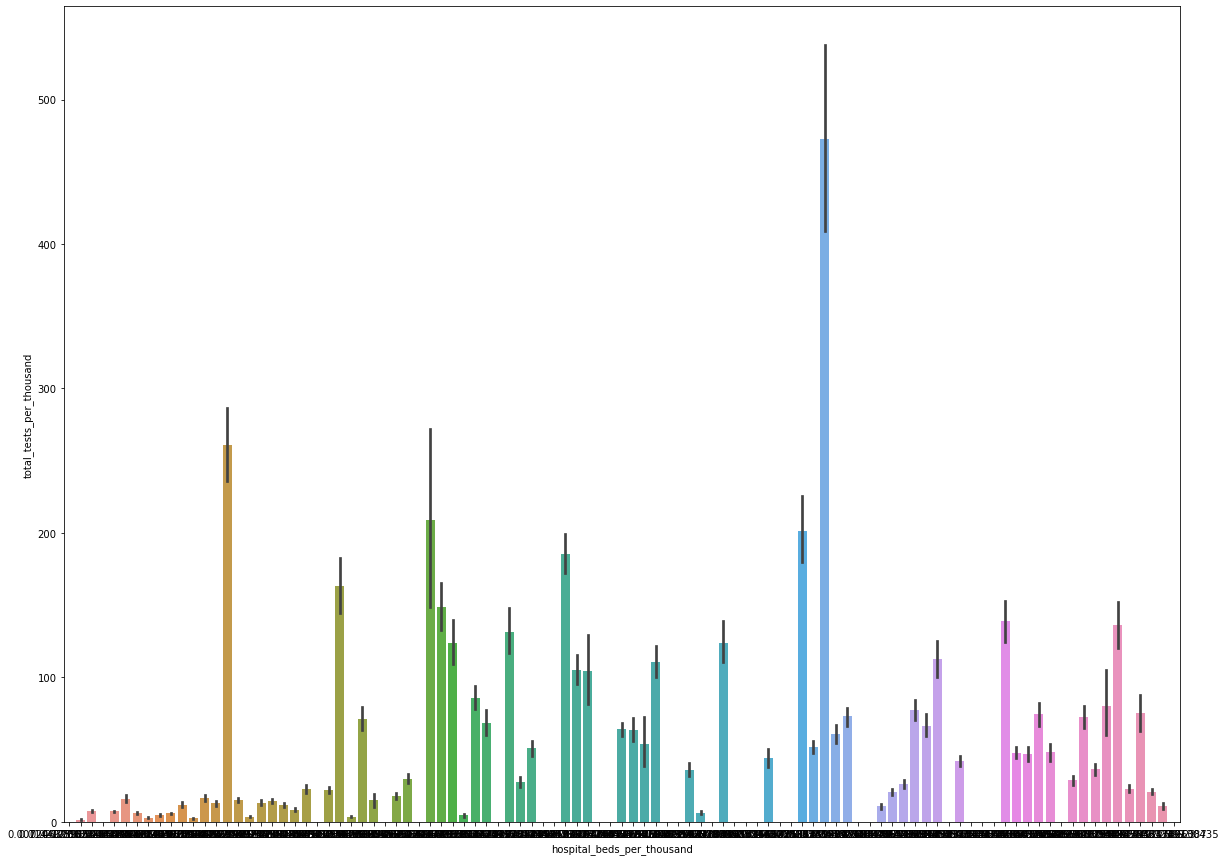

In [48]:
df["hospital_beds_per_thousand"]=(df["hospital_beds_per_thousand"])/df["hospital_beds_per_thousand"].max()
plt.figure(figsize=(20,15))
ax = sns.barplot(y=df['total_tests_per_thousand'], x=df["hospital_beds_per_thousand"])

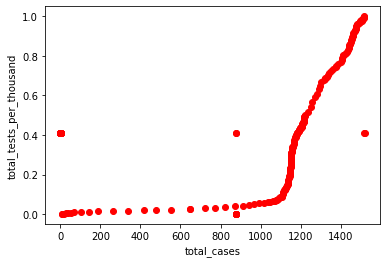

In [151]:

df_nzl_num['total_tests']=(df_nzl_num['total_tests'])/df_nzl_num['total_tests'].max()
plt.scatter(y = df_nzl_num['total_tests'], x =df_nzl_num['total_cases'], color='red')
plt.xlabel("total_cases")
plt.ylabel("total_tests_per_thousand")
plt.show()

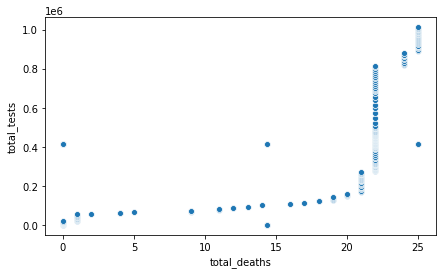

In [145]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['total_deaths'], y=df_nzl_num["total_tests"])

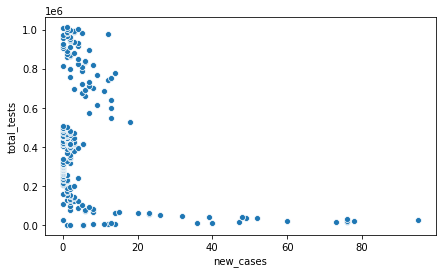

In [147]:
#cardiovasc_death_rate
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_cases'], y=df_nzl_num['total_tests'])

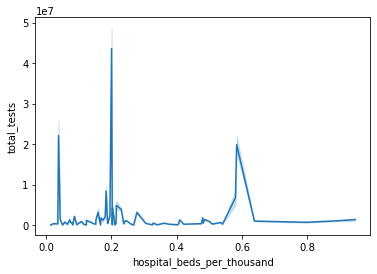

In [71]:
sns.lineplot(x=df['hospital_beds_per_thousand'], y=df["total_tests"],data=df)

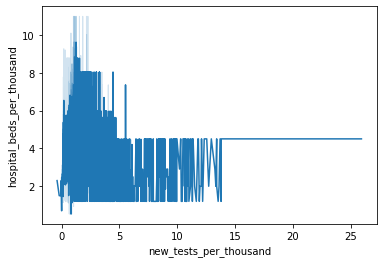

In [34]:
#new_tests_per_thousand
#line plot 
sns.lineplot(x=df['new_tests_per_thousand'], y=df["hospital_beds_per_thousand"],data=df)


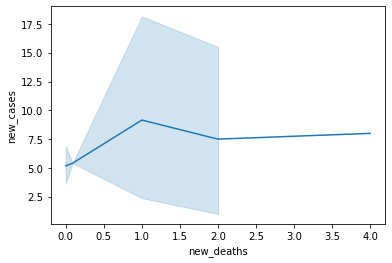

In [148]:
#line plot 
sns.lineplot(x='new_deaths',y='new_cases', data=df_nzl_num)

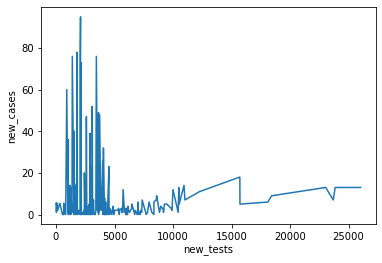

In [149]:
#line plot 
sns.lineplot(x='new_tests',y='new_cases', data=df_nzl_num)

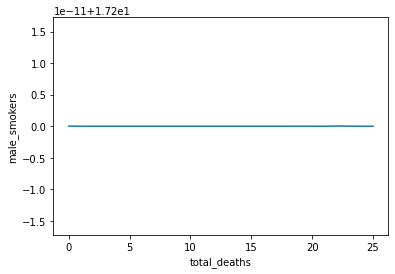

In [153]:
#line plot 
sns.lineplot(x='total_deaths',y='male_smokers', data=df_nzl_num)

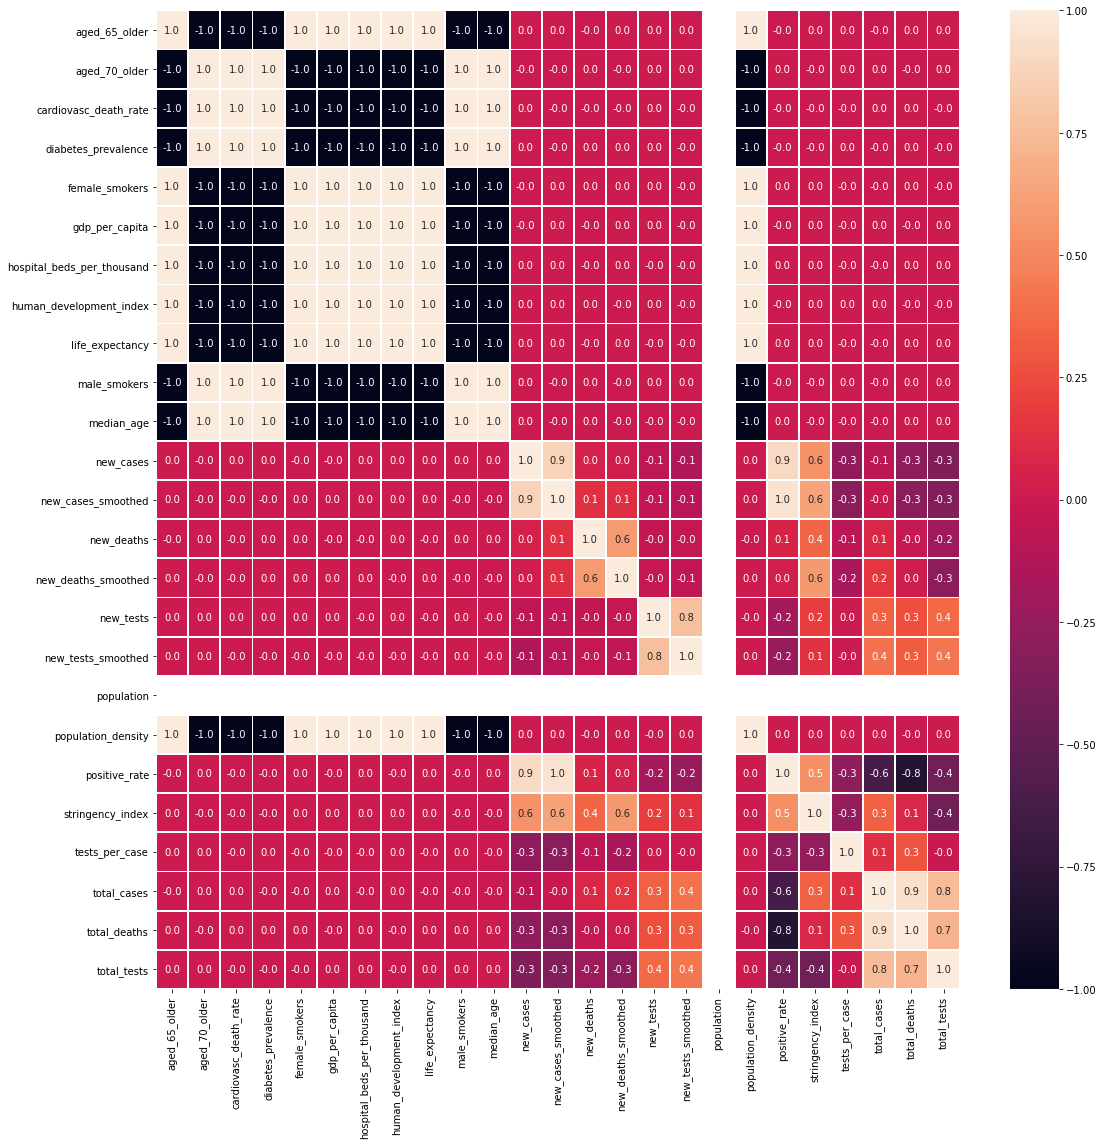

In [64]:

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_nzl_num.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [65]:
drop_list=['cardiovasc_death_rate','diabetes_prevalence','female_smokers','gdp_per_capita','male_smokers','human_development_index',
           'life_expectancy','population','new_tests_smoothed','new_deaths_smoothed','new_cases_smoothed','aged_65_older','aged_70_older',
            'median_age','population_density']

In [66]:
df_1=df_nzl_num.drop(drop_list,axis=1)
#df_nr_1=df_nr.drop(drop_list,axis=1)

In [67]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hospital_beds_per_thousand  290 non-null    float64
 1   new_cases                   281 non-null    float64
 2   new_deaths                  281 non-null    float64
 3   new_tests                   219 non-null    float64
 4   positive_rate               212 non-null    float64
 5   stringency_index            281 non-null    float64
 6   tests_per_case              194 non-null    float64
 7   total_cases                 281 non-null    float64
 8   total_deaths                281 non-null    float64
 9   total_tests                 219 non-null    float64
dtypes: float64(10)
memory usage: 24.9 KB


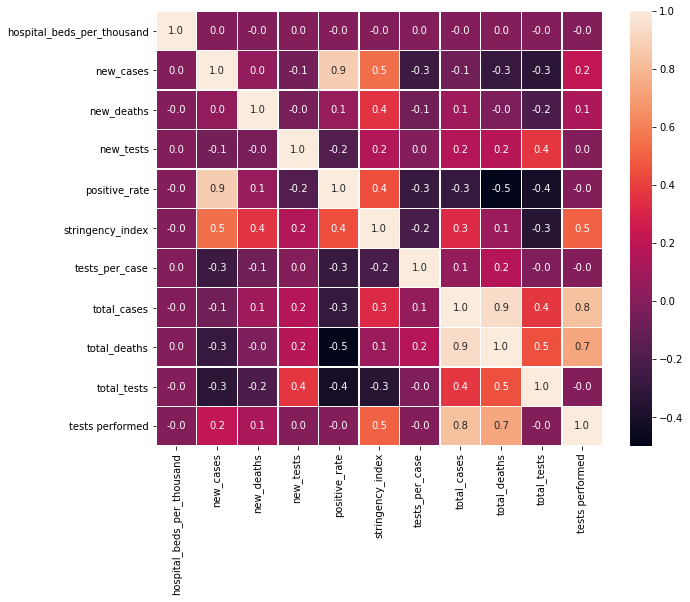

In [174]:
#correlation map
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_1.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)

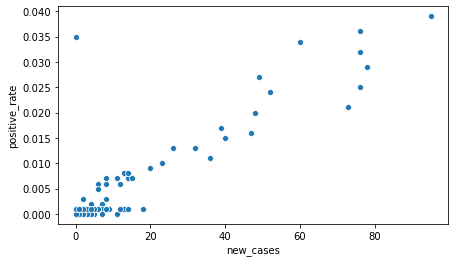

In [14]:
#no of active cases
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_cases'], y=df_nzl_num["positive_rate"])


<Figure size 720x720 with 0 Axes>

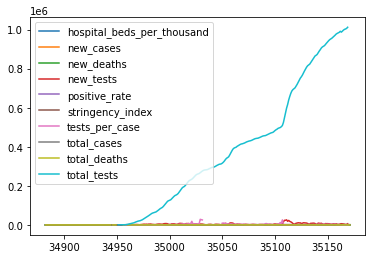

In [70]:

plt.figure(figsize=(10,10))
df_1.plot.line()